In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
from sklearn.decomposition import PCA

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('../Downloads/Social_Network_Ads.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [7]:
data.shape

(400, 5)

In [8]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
data.drop(columns='User ID',inplace=True)

In [10]:
data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

In [13]:
data['Gender'] = le.fit_transform(data['Gender'])

In [14]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [15]:
# checking numbers of unique value in each columns
uni = []
for col in data.columns:
    uni.append(len(np.unique(data[col])))
pd.DataFrame({"columns":data.columns,
             "Unique":uni})

,columns,Unique
0,Gender,2
1,Age,43
2,EstimatedSalary,117
3,Purchased,2


In [16]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
y = y.reshape(-1,1)

In [17]:
X.shape , y.shape

((400, 3), (400, 1))

In [18]:
from sklearn.preprocessing import StandardScaler
stdSclar = StandardScaler()
X = stdSclar.fit_transform(X)


In [19]:
pd.DataFrame(X).head()

,0,1,2
0,1.020204,-1.781797,-1.490046
1,1.020204,-0.253587,-1.460681
2,-0.980196,-1.113206,-0.785290
3,-0.980196,-1.017692,-0.374182
4,1.020204,-1.781797,0.183751


In [20]:
pca = PCA().fit(X)

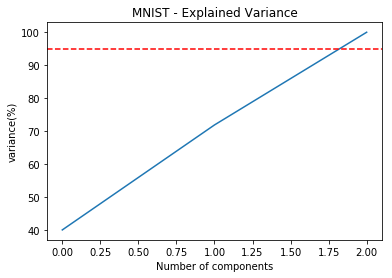

In [21]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('Number of components')
plt.ylabel('variance(%)')
plt.title('MNIST - Explained Variance')
plt.axhline(y=95,color = 'r', linestyle = '--')
plt.show()

In [22]:
pca  = PCA(2).fit(X)
X = pca.transform(X)

In [23]:
num = []
train_acc = []
validate_acc = []

for x in range(1,101):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=80,stratify=y)
    logReg= LogisticRegression(C=(x/10))
    logReg.fit(Xtrain,ytrain)
    pre = logReg.predict(Xtest)
    num.append(x/10)
    train_acc.append(logReg.score(Xtrain,ytrain))
    validate_acc.append(logReg.score(Xtest,ytest))

In [24]:
tra = pd.DataFrame({
    'C':num,
    'train_acc':train_acc,
    'validate_acc':validate_acc
})
max(tra['validate_acc'])

0.8484848484848485

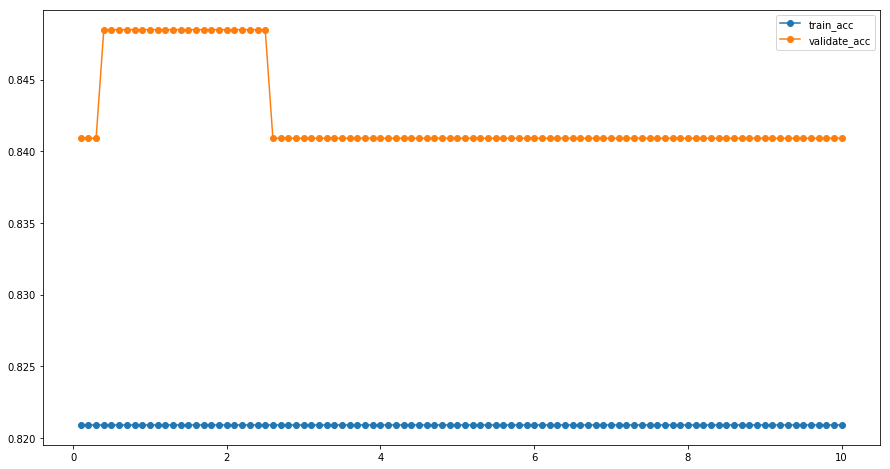

In [25]:
plt.figure(figsize=(15,8))
plt.plot(tra['C'],tra['train_acc'],marker='o')
plt.plot(tra['C'],tra['validate_acc'],marker='o')
plt.legend()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=80,stratify=y)

In [27]:
X_train.shape , y_train.shape

((268, 2), (268, 1))

In [28]:
lr= LogisticRegression(C=2.6)

In [29]:
lr.fit(X_train,y_train)

LogisticRegression(C=2.6, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
pred= lr.predict(X_test)

In [31]:
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8409090909090909
[[78  7]
 [14 33]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        85
           1       0.82      0.70      0.76        47

   micro avg       0.84      0.84      0.84       132
   macro avg       0.84      0.81      0.82       132
weighted avg       0.84      0.84      0.84       132



In [32]:
log_reg = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 40)
log_reg.mean()

0.8230654761904763

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dtc = DecisionTreeClassifier()

In [40]:
dt = DecisionTreeClassifier(random_state=1,max_depth=2,criterion='gini')
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)
dt.score(X_train,y_train)*100

82.08955223880598

In [41]:
#print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[76  9]
 [14 33]]
82.57575757575758


In [42]:
dt.feature_importances_

array([0.6245383, 0.3754617])

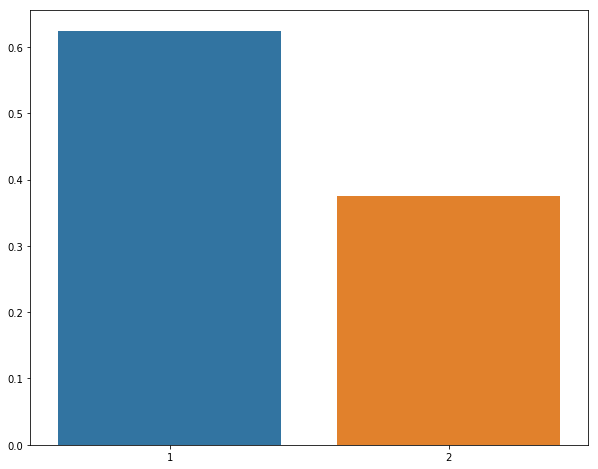

In [43]:
plt.figure(figsize=(10,8))
sns.barplot(y =dt.feature_importances_,x=[1,2])

### Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rfc = RandomForestClassifier()

In [56]:
parameters =[{'n_estimators':[x for x in range(1,101,10)],'criterion':['gini'],'max_depth':[y for y in range(1,10)],'random_state':[z for z in range(1,11)]}]

In [57]:
gridSearchCV = GridSearchCV(estimator= rfc,
                           param_grid= parameters,
                           scoring='accuracy',
                           cv=40,
                           n_jobs=-1)

In [49]:
rf = RandomForestClassifier(random_state=10,n_estimators=41,criterion='gini',max_depth=2)

In [50]:
rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)

In [51]:
#print confusion matrix and accuracy score
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[79  6]
 [14 33]]
84.84848484848484


In [53]:
rf.feature_importances_

array([0.52101577, 0.47898423])

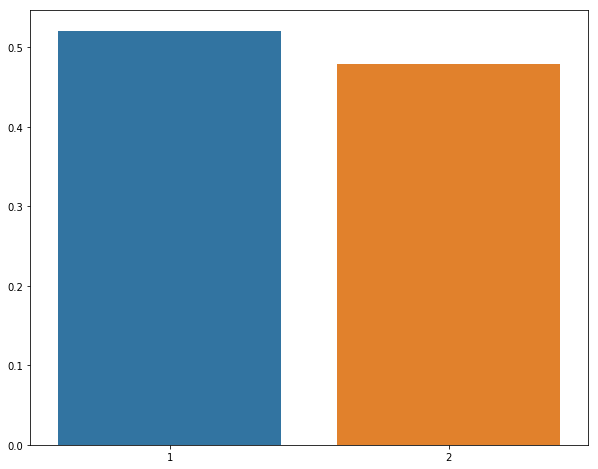

In [55]:
plt.figure(figsize=(10,8))
sns.barplot(y =rf.feature_importances_,x=[1,2])